In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [49]:
from numba import jit
import numpy as np


@jit(nopython=True)
def mandelbroth(real, imaginary, max_iter):

    c = complex(real, imaginary)
    z = 0.0j

    for i in range(max_iter):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i
        
    return max_iter



@jit(nopython=True)
def mandelbrot_set(real, imaginary, max_iter=100):

    mandelbrot = np.zeros((len(real), len(imaginary)), dtype=np.int64)

    for i in range(len(real)):

        for j in range(len(imaginary)):
            mandelbrot[i, j] = mandelbroth(real[i], imaginary[j], max_iter)

    return mandelbrot


0.0 %
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.0 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.0 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.0 %
29.0 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.0 %
56.0 %
57.0 %
58.0 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %


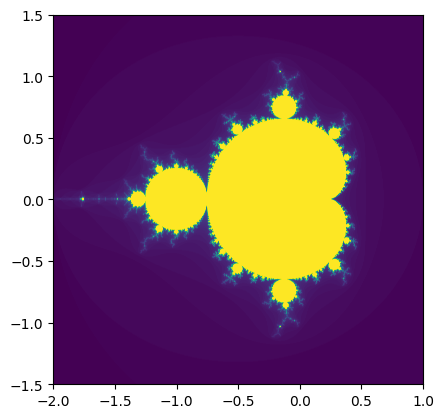

In [45]:
real = np.linspace (-2,1,10000)
imaginary = np.linspace (-1.5,1.5,10000)

# creates a 2D array of the mandelbrot set 
mandelbrot = mandelbrot_set(real, imaginary).T

plt.imshow(mandelbrot, extent = [-2,1,-1.5,1.5])
plt.savefig("Fractal.png",dpi= 2000)
plt.show()

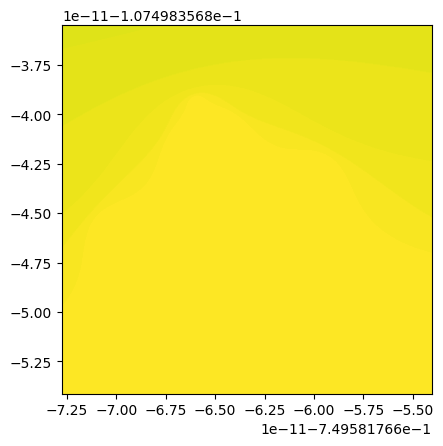

In [54]:
from matplotlib.animation import FuncAnimation

# Create initial plot
fig, ax = plt.subplots()

real_values = np.linspace(-2, 1, 800)
imaginary_values = np.linspace(-1.5, 1.5, 800)
mandelbrot = mandelbrot_set(real_values, imaginary_values)

im = ax.imshow(mandelbrot.T, extent=[-2, 1, -1.5, 1.5], animated=True)

def find_edge_coordinates(mandelbrot_set):
    
    edge_coords = np.argwhere(mandelbrot_set[:-1, :-1] != mandelbrot_set[1:, 1:])
    return edge_coords

def update(frame):
    global real_values, imaginary_values

    mandelbrot = mandelbrot_set(real_values, imaginary_values)
    edge_coords = find_edge_coordinates(mandelbrot)

    if len(edge_coords) == 0:
        return

    edge_x, edge_y = np.mean(edge_coords, axis=0)
    
    center_real = real_values[int(edge_x)]
    center_imag = imaginary_values[int(edge_y)]

    zoom_factor = 0.95

    real_values = real_values * zoom_factor + (1 - zoom_factor) * center_real
    imaginary_values = imaginary_values * zoom_factor + (1 - zoom_factor) * center_imag

    # Recalculate Mandelbrot set and update plot
    mandelbrot = mandelbrot_set(real_values, imaginary_values)
    im.set_array(mandelbrot.T)
    im.set_extent([real_values[0], real_values[-1], imaginary_values[0], imaginary_values[-1]])

    return [im]

# Create animation
ani = FuncAnimation(fig, update, frames=500, blit=True)
ani.save('mandel_zoom.gif', writer='pillow', fps=30)
plt.show()


In [71]:
def monte_carlo(samples, array):

    array_size = array.shape[0]

    # we can recognize the max iterations since it will be the max in array
    max_iter = np.max(array)  
    total_area = 3 * 3  # (1 - (-2)) * (1.5 - (-1.5))
    x = np.random.randint(0, array_size, size=samples)
    y = np.random.randint(0, array_size, size=samples)
    
    inside = np.sum(array[x, y] == max_iter)
    
    return (inside / samples) * total_area

print("The area of the mandelbrot set is approximately", monte_carlo(100000000,mandelbrot))


The area of the mandelbrot set is approximately 1.54253592


In [73]:
real_values = np.linspace(-2, 1, 1000)
imaginary_values = np.linspace(-1.5, 1.5, 1000)

iterations = np.logspace(0, 3, 50, dtype=int)  # From 10^0=1 to 10^3=1000, 10 points
samples = np.logspace(2, 7, 50, dtype=int)  # From 10^2=100 to 10^6=1,000,000, 10 points

areas = []
iteration_list = []
sample_size_list = []

for iter in iterations:
    print(f"current iteration is {iter}")
    mandelbrot_array = mandelbrot_set(real_values,imaginary_values, max_iter=iter)
    for s in samples:
        area = monte_carlo(s, mandelbrot_array)
        
        areas.append(area)
        iteration_list.append(iter)
        sample_size_list.append(s)

current iteration is 1
current iteration is 5
current iteration is 10
current iteration is 50
current iteration is 100
current iteration is 200
current iteration is 500


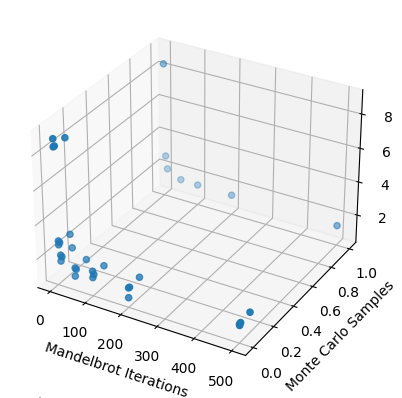

In [74]:
areas = np.array(areas)
iteration_list = np.array(iteration_list)
sample_size_list = np.array(sample_size_list)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iteration_list, sample_size_list, areas)

ax.set_xlabel('Mandelbrot Iterations')
ax.set_ylabel('Monte Carlo Samples')
ax.set_zlabel('Estimated Area')

plt.show()